###  To install polsartools try  ``pip install polsartools``
If the above fails because of gdal package, try to install gdal using `conda install gdal -c conda-forge` then install `polsartools`


In [1]:
import polsartools as pst
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def read_rst(file):
    ds = gdal.Open(file)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    arr[arr==0] = np.nan
    return arr


def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    # Function to compute vmin and vmax based on nanpercentiles
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]  # Remove NaNs
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax
    
    # Number of images to plot
    num_images = len(filenames)

    # Calculate the number of rows and columns
    ncols = min(max_cols, num_images)  # Use max_cols but limit it to num_images
    nrows = np.ceil(num_images / ncols).astype(int)  # Calculate number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten() 

    for i, filename in enumerate(filenames):
        data = read_rst(filename)  # Load the data from the file
        vmin, vmax = compute_vmin_vmax(data)
        ax = axes[i]
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filename))
        fig.colorbar(im, ax=ax)

    # Turn off any unused axes
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### Provide path to the UAVSAR annotation file. Make sure that extracted data and ``*.ann`` file are in the same folder

In [3]:

annFile = r"./winnip_31606_12049_004_120627_L090_CX_03_grd/winnip_31606_12049_004_120627_L090_CX_03.ann"

#The follwoing function extracts C3 matrix from UAVSAR GRD data

pst.uavsar_grd(annFile)


C3 folder does not exist. 
Creating folder ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3
Extracted C3 files to ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3
Execution time for uavsar_grd: 5.46 seconds


## Speckle filtering using polarimetric refined-Lee filter 

In [4]:
"""
The following function generates speckel filtered polarimetric matrices using refined lee polarimetric speckle filter: 
        
input C3/T3/C2/T2 folder path, window_size between 3-31  

"""

C3Folder = os.path.join(os.path.dirname(annFile),'C3')

pst.rlee(C3Folder,window_size=3)

Progress : 100%|██████████| 260/260 [00:47<00:00,  5.42 block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C11.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C12_real.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C12_imag.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C13_real.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C13_imag.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C22.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C23_real.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C23_imag.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C33.bin
Execution time for rlee: 73.56 seconds


## H/A/α Decomposition

Progress : 100%|██████████| 260/260 [01:29<00:00,  2.89 block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\H_fp.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\alpha_fp.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\anisotropy_fp.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\e1_norm.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\e2_norm.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\e3_norm.tif
Execution time for halphafp: 112.04 seconds


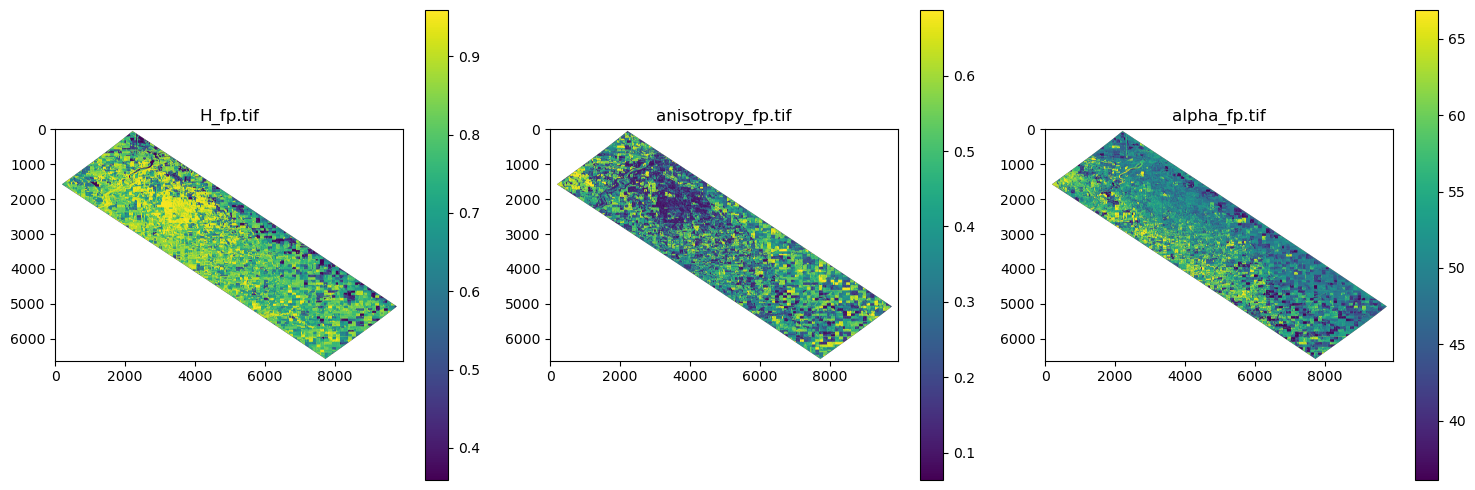

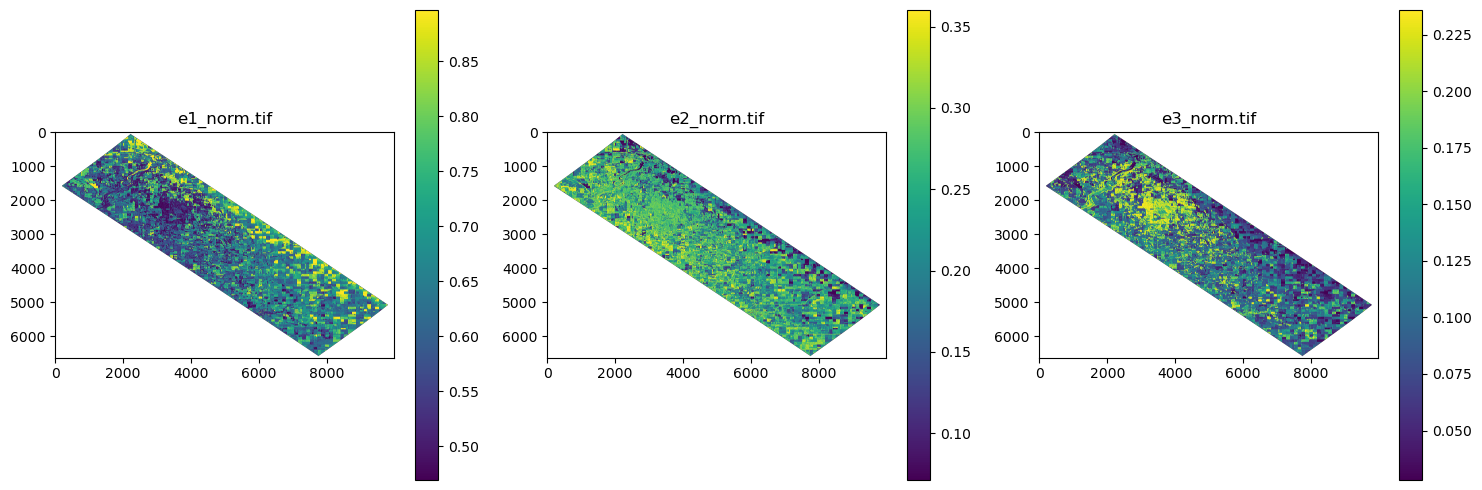

In [5]:

"""
The following function generates H/A/alpha demposition paramters: 
        Alpha, entropy, anisotropy and 
        normalized eigen values e1_norm, e2_norm, e3_norm in geotif format

input C3/T3 folder path, window_size is optional  

"""
# update the C3 folder based on your folder
C3Folder = './winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3'

pst.polsar.fp.halphafp(C3Folder,window_size=3) 


### Plotting
plot_images(os.path.join(C3Folder,'H_fp.tif'),
             os.path.join(C3Folder,'anisotropy_fp.tif'),
              os.path.join(C3Folder,'alpha_fp.tif'))

plot_images(os.path.join(C3Folder,'e1_norm.tif'),
             os.path.join(C3Folder,'e2_norm.tif'),
             os.path.join(C3Folder,'e3_norm.tif'))




## Neumann Decomposition

Progress : 100%|██████████| 260/260 [00:37<00:00,  6.93 block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\Neu_psi.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\Neu_delta_mod.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\Neu_delta_pha.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\Neu_tau.tif
Execution time for neufp: 52.56 seconds


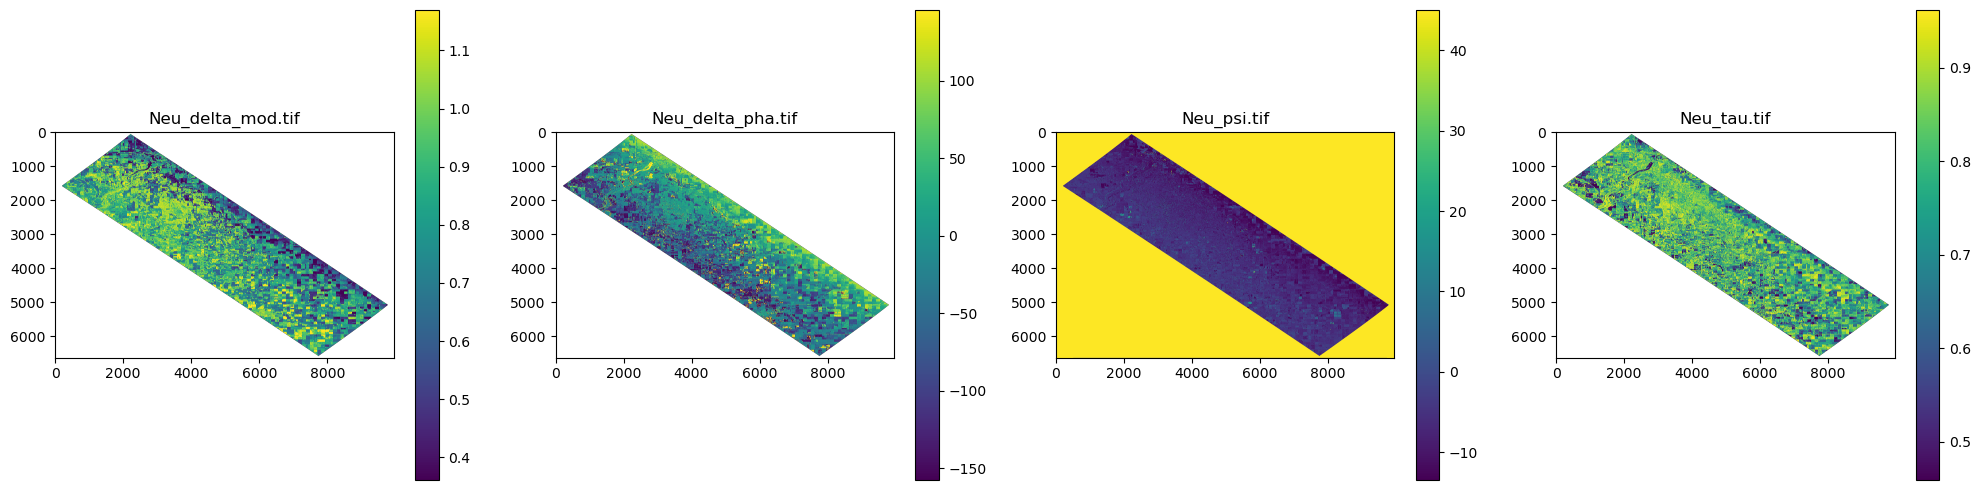

In [6]:
"""
The following function generates Nuemann demposition paramters: 
        Neu_psi, Neu_delta_mod, Neu_delta_pha, and Neu_tau in geotif format

input C3/T3 folder path, window_size is optional  

"""

C3Folder = './winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3'

pst.polsar.fp.neufp(C3Folder,window_size=3) 

### Plotting
plot_images( os.path.join(C3Folder,'Neu_delta_mod.tif'),
             os.path.join(C3Folder,'Neu_delta_pha.tif'),
             os.path.join(C3Folder,'Neu_psi.tif'),
             os.path.join(C3Folder,'Neu_tau.tif'),
                      )


## Non-negative eigen value decomposition (NNED )

Progress : 100%|██████████| 260/260 [00:30<00:00,  8.59 block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\NNED_odd.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\NNED_dbl.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\NNED_vol.tif
Execution time for nnedfp: 42.84 seconds


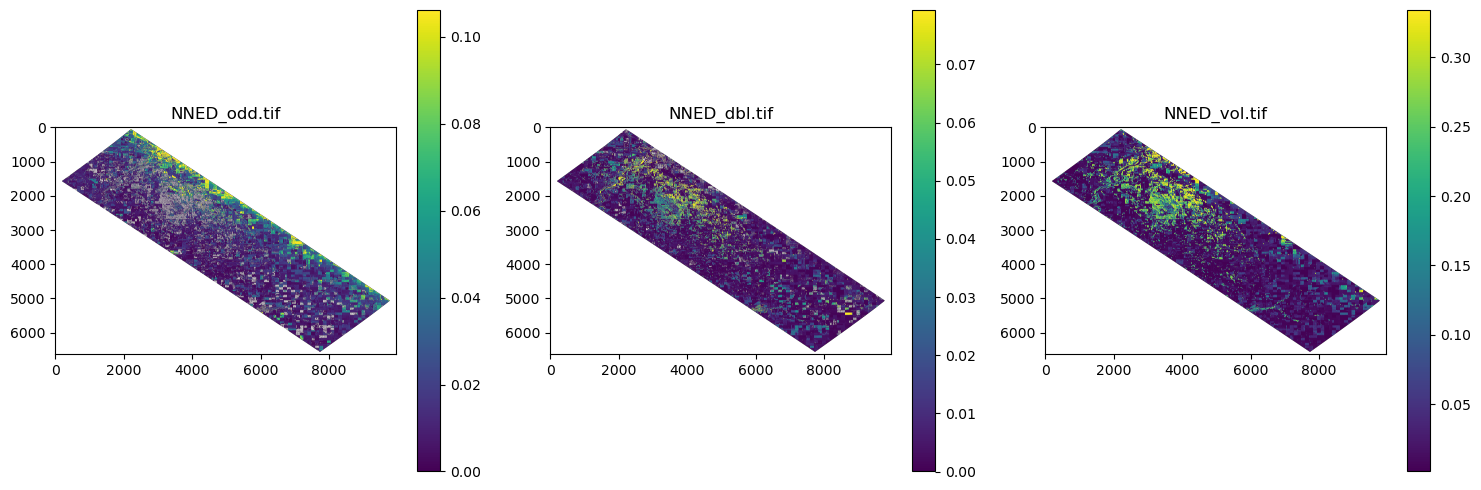

In [8]:
"""
The following function generates Non-negative eigen value decomposition demposition powers: 
        NNED_odd, NNED_dbl, NNED_vol in geotif format

input C3/T3 folder path, window_size is optional  

"""
C3Folder = './winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3'

pst.polsar.fp.nnedfp(C3Folder,window_size=3) 

### Plotting
plot_images(os.path.join(C3Folder,'NNED_odd.tif'),
             os.path.join(C3Folder,'NNED_dbl.tif'),
              os.path.join(C3Folder,'NNED_vol.tif'))